In [1]:
import sys
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from nilearn import image
from nilearn.glm.first_level import FirstLevelModel
from nilearn.plotting import plot_design_matrix
from nilearn.interfaces.fmriprep import load_confounds
from nilearn import plotting
sys.path.append('..')
from utils.data import Subject, load_participant_list

In [2]:
base_dir = '/home/ubuntu/data/learning-habits'
bids_dir = "/home/ubuntu/data/learning-habits/bids_dataset/derivatives/fmriprep-24.0.1"

all_sub_ids = load_participant_list(base_dir)

sub_ids = all_sub_ids

In [3]:
len(sub_ids)

62

In [4]:
subjects = [Subject(base_dir, sub_id, include_modeling=True, include_imaging=True, bids_dir=bids_dir) for sub_id in sub_ids]

/home/ubuntu/repos/learning-habits-analysis/notebooks/../utils/data.py:165: UserWarning: Last 1 trial(s) of block had no response, filling with 0


In [5]:
# get the reference images to know the shape of the data
N_learning = image.load_img(subjects[0].img.get('learning1')).shape[-1]
N_test = image.load_img(subjects[0].img.get('test')).shape[-1]

In [6]:
all_volumes = np.zeros((len(subjects), 3))
all_volumes[:, :2] = N_learning
all_volumes[:, 2] = N_test

In [33]:
valid_volumes = np.zeros((len(subjects), 3))

for i, sub in enumerate(subjects):
    for j, run in enumerate(sub.runs):
        N_block = all_volumes[i,j]
        img_path = sub.img.get(run)
        _, sample_mask  = load_confounds(img_path,
                                         strategy=('motion','high_pass','wm_csf',
                                                   'scrub'),
                                         scrub=3,
                                         fd_threshold=.5,
                                         std_dvars_threshold=3) # type: ignore
        valid_volumes[i,j] = len(sample_mask) if sample_mask is not None else N_block

/tmp/ipykernel_652082/3370350342.py:7: DeprecationWarning: The default parameter for std_dvars_threshold is currently 3 which is inconsistent with the fMRIPrep default of 1.5. In release 0.13.0, the default strategy will be replaced by 1.5.
  _, sample_mask  = load_confounds(img_path,
/tmp/ipykernel_652082/3370350342.py:7: DeprecationWarning: The default parameter for std_dvars_threshold is currently 3 which is inconsistent with the fMRIPrep default of 1.5. In release 0.13.0, the default strategy will be replaced by 1.5.
  _, sample_mask  = load_confounds(img_path,
/tmp/ipykernel_652082/3370350342.py:7: DeprecationWarning: The default parameter for std_dvars_threshold is currently 3 which is inconsistent with the fMRIPrep default of 1.5. In release 0.13.0, the default strategy will be replaced by 1.5.
  _, sample_mask  = load_confounds(img_path,
/tmp/ipykernel_652082/3370350342.py:7: DeprecationWarning: The default parameter for std_dvars_threshold is currently 3 which is inconsistent 

In [34]:
scrubbed_volumes = (all_volumes - valid_volumes)/all_volumes

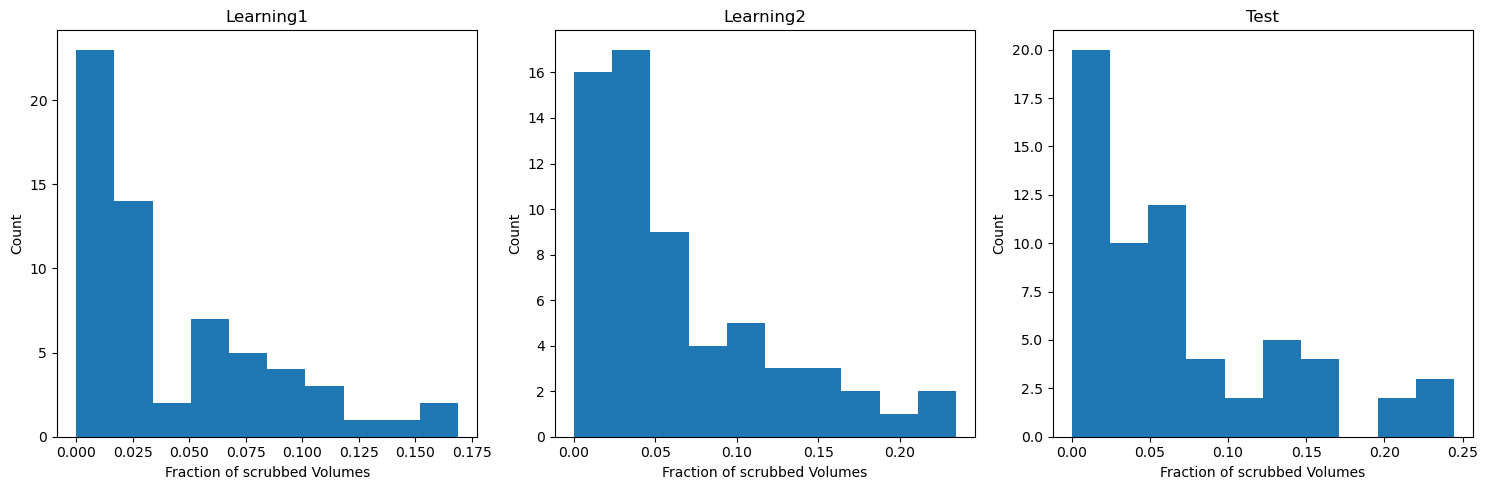

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].hist(scrubbed_volumes[:, 0], bins=10, label='learning1')
axes[0].set_title('Learning1')
axes[0].set_xlabel('Fraction of scrubbed Volumes')
axes[0].set_ylabel('Count')

axes[1].hist(scrubbed_volumes[:, 1], bins=10, label='learning2')
axes[1].set_title('Learning2')
axes[1].set_xlabel('Fraction of scrubbed Volumes')
axes[1].set_ylabel('Count')

axes[2].hist(scrubbed_volumes[:, 2], bins=10, label='test')
axes[2].set_title('Test')
axes[2].set_xlabel('Fraction of scrubbed Volumes')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [28]:
# exclusion threshold
max_scrub = 0.2

In [29]:
for run in range(3):
    subject_ids = [sub_ids[i] for i in range(len(sub_ids)) if scrubbed_volumes[i, run] > max_scrub]
    print(f'Run {run+1}: {len(subject_ids)} subjects with > {max_scrub} scrubbed volumes')
    print(f'Subject IDs: {subject_ids}')


Run 1: 33 subjects with > 0.2 scrubbed volumes
Subject IDs: ['05', '06', '08', '10', '12', '13', '15', '16', '19', '21', '22', '23', '27', '28', '33', '34', '35', '40', '43', '45', '47', '50', '51', '53', '55', '56', '57', '62', '63', '65', '70', '71', '73']
Run 2: 36 subjects with > 0.2 scrubbed volumes
Subject IDs: ['01', '03', '04', '06', '08', '09', '10', '15', '16', '19', '21', '22', '24', '27', '28', '29', '30', '33', '37', '43', '45', '47', '48', '49', '52', '54', '56', '57', '58', '60', '63', '65', '70', '71', '72', '73']
Run 3: 31 subjects with > 0.2 scrubbed volumes
Subject IDs: ['01', '06', '08', '09', '10', '13', '15', '16', '20', '22', '24', '27', '28', '30', '33', '35', '37', '38', '43', '45', '47', '48', '49', '51', '52', '56', '57', '58', '63', '65', '70']
